# Sampling from Posterior Distribution

The Posterior distribution under the assumption of a conjugate Gaussian distribution. 

$$
\log p(w) \propto -\frac{\beta}{2} (y - Xw)^T (y - Xw) - \frac{\alpha}{2} \|w\|^2
$$

$$
\log p(w) \propto -\frac{1}{2} w^T (\underbrace{\beta X^TX + \alpha I}_{\Sigma^{-1}}) w  + \beta w^T X^T y
$$

$$
\log p(w) \propto -\frac{1}{2} w^T (\underbrace{\beta X^TX + \alpha I}_{\Sigma^{-1}}) w  + w^T \underbrace{\beta X^T y}_{\Sigma^{-1} \mu}
$$

$$
\Sigma = (\beta X^TX + \alpha I)^{-1}
$$

$$
\mu = \Sigma\beta X^T y = (\beta X^TX + \alpha I)^{-1}\beta X^T y = w_{\text{MAP}} 
$$

$$
\log p(w) \propto -\frac{1}{2} w^T \Sigma^{-1} w  + w^T \Sigma^{-1} \mu
$$

$$
\log p(w) \propto -\frac{1}{2} w^T \Sigma^{-1} w  + w^T \Sigma^{-1} \mu + \frac{1}{2}\mu^T\Sigma^{-1}\mu - \frac{1}{2}\mu^T\Sigma^{-1}\mu
$$

$$
\log p(w) = -\frac{1}{2} (w - \mu)^T \Sigma^{-1} (w - \mu) + \frac{1}{2} \mu^T \Sigma^{-1} \mu
$$

$$
p(w|data, \beta, \alpha) \propto \exp\left\{-\frac{1}{2} (w - \mu)^T \Sigma^{-1} (w - \mu) \right\}
$$

The posterior is over the regression parameters $w = (w_1,w_2,...,w_M)^T$ is a multivariate gaussian:

$$
p(w|data, \beta, \alpha) = \frac{1}{|2\pi|^{(M+1)/2}}\frac{1}{|\Sigma|^{1/2}} \exp\left\{-\frac{1}{2} (w - \mu)^T \Sigma^{-1} (w - \mu) \right\}, \,\,\, \Sigma = (\beta X^TX + \alpha I)^{-1}, \,\,\, \mu = \Sigma\beta X^T y
$$

where, $\mu$ is an (M+1)-dimensional mean vector, $\Sigma$ is an (M+1) $\times$ (M+1) covariance matrix and $|\Sigma|$ is the determinant of $\Sigma$.

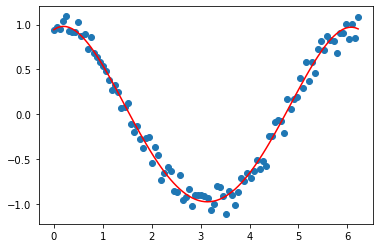

In [18]:
import numpy as np
import matplotlib.pylab as plt

def design_matrix(x, degree):
    return np.power.outer(x, np.arange(degree+1))

np.random.seed(1243)

N = 100
freq = 1
x = np.linspace(0, 2*np.pi, N, endpoint=False)

# true model + noise-free data
degree_true = 4
theta_true = np.polyfit(x, np.cos(freq*x), degree_true)[::-1]
X_true = design_matrix(x, degree_true) 
y_true = X_true @ theta_true

# generating artificial noise + data
sigma = 0.1
y = y_true + np.random.standard_normal(N) * sigma

# model with potentially wrong degree
degree = 9
X = design_matrix(x, degree)

if degree>=degree_true:
    theta_true = np.pad(theta_true, (0, (degree - degree_true)), 'constant')

# plot y_true
fig, ax = plt.subplots()
ax.plot(x, y_true, color='r')
ax.scatter(x, y);

In [19]:
# multivariate gaussian parameters
beta = 1/sigma**2
alpha = 1.
Sigma = np.linalg.inv(beta * X.T @ X + alpha * np.eye(degree+1))
mu = beta * Sigma @ X.T @ y

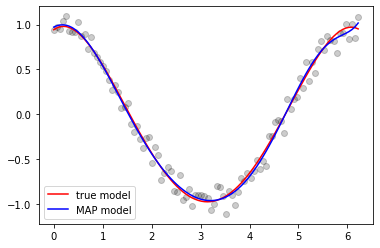

In [20]:
fig, ax = plt.subplots()
ax.plot(x, y_true, color='r', label='true model')
ax.plot(x, X@mu, color='b', label='MAP model')
ax.scatter(x, y, color='k', alpha=0.2)
ax.legend();

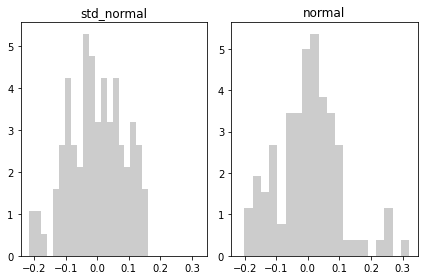

In [21]:
# testing normal distribution functions
np.random.seed(1243)
std_normal = np.random.standard_normal(N)*sigma
normal = np.random.normal(0,sigma, N)

#plot noise
fig, ax = plt.subplots(1,2, sharex=True)
for a, noise, namestr in zip(ax, [std_normal, normal],['std_normal', 'normal']):
    a.hist(noise, bins=20, density=True, alpha=0.2, color='k')
    a.set_title(r'%s'%namestr)
fig.tight_layout() 

<ipython-input-22-c0f709864dab>:2: RuntimeWarning: covariance is not positive-semidefinite.
  w_samples = np.random.multivariate_normal(mu, Sigma, size=1000)


   Posterior mean: [ 0.973  0.276 -0.754 -0.19   0.335 -0.116  0.014  0.001 -0.     0.   ]
              MAP: [ 0.973  0.281 -0.76  -0.191  0.341 -0.12   0.015  0.001 -0.     0.   ]
true coefficients: [ 0.944  0.394 -1.094  0.328 -0.026  0.     0.     0.     0.     0.   ]


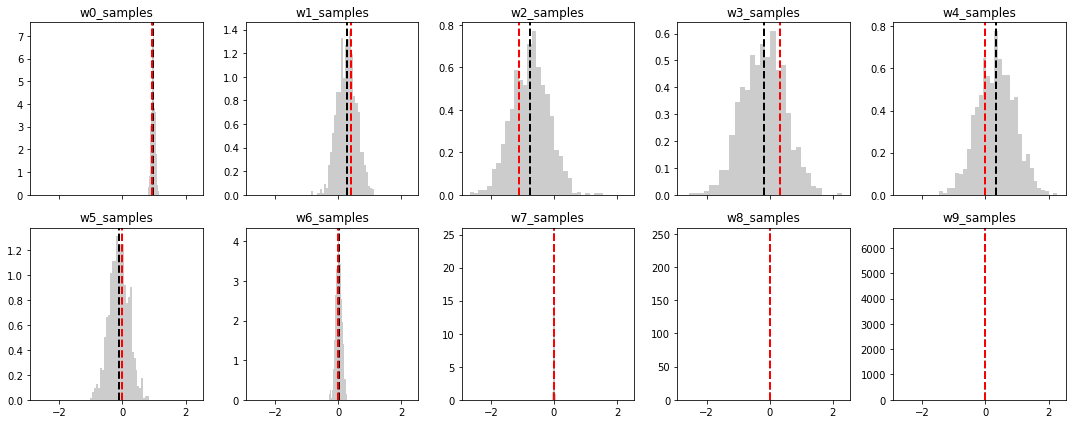

In [22]:
# Monte Carlo does this differently
w_samples = np.random.multivariate_normal(mu, Sigma, size=1000)
fig, ax = plt.subplots(2, 5, figsize=(15, 6), sharex='all')
ax = list(ax.flat)

#for i, (a, w) in enumerate(zip(ax, w_samples.T)):
for i, w in enumerate(w_samples.T):
    ax[i].hist(w, bins=30, density=True, alpha=0.2, color='k')
    ax[i].set_title(r'w%i_samples'%i)
    ax[i].axvline(mu[i], color='k', ls='--', lw=2)
    ax[i].axvline(theta_true[i], color='r', ls='--', lw=2)
    
fig.tight_layout()
print('   Posterior mean:', np.round(w_samples.mean(0), 3))
print('              MAP:', np.round(mu, 3))
print('true coefficients:', np.round(theta_true, 3))

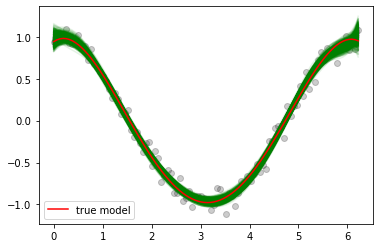

In [23]:
fig, ax = plt.subplots()
for w in w_samples:
    ax.plot(x, X@w, color='g', alpha=0.1)
ax.plot(x, y_true, color='r', label='true model')
ax.scatter(x, y, color='k', alpha=0.2)
ax.legend();

* https://en.wikipedia.org/wiki/Monty_Hall_problem

* https://en.wikipedia.org/wiki/Multivariate_normal_distribution